In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from datetime import datetime

In [5]:
train_data = pd.read_json(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\FlipRobo\Project\product-review-summarization-project\Cell_Phones_and_Accessories.json")

In [6]:
print("The dataset contains {0[0]: ,.0f} rows and {0[1]: .0f} variables.".format(train_data.shape))
train_data.head()

The dataset contains  760,450 rows and  11 variables.


,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3,None
4,4,True,"12 19, 2013",B00AKZWGAC,None,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None,None


In [7]:
# Convert string into datetime

train_data["Review_Date"] = train_data["Review_Date"].apply(lambda x: datetime.strptime(x, '%m %d, %Y'))
train_data["Review_Date"].head()

0   2015-09-01
1   2016-01-09
2   2013-04-21
3   2013-02-27
4   2013-12-19
Name: Review_Date, dtype: datetime64[ns]

In [8]:
train_data.IC.value_counts()

B00VH88CJ0    1127
B005NF5NTK    1106
B019PV2I3G    1033
B00X5RV14Y    1018
B00P7N0320    1011
              ... 
B01G2LFEHY       1
B004EKCU1E       1
B017RBHYVW       1
B019G1RRI6       1
B010ONDJ1O       1
Name: IC, Length: 48134, dtype: int64

In [9]:
train_data.isnull().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352624
Reviewer_Name           91
Review                 530
Rev_summ               355
Review_timestamp         0
Useful              698250
Prod_img            742256
dtype: int64

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760450 entries, 0 to 760449
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Rating            760450 non-null  int64         
 1   Rev_verify        760450 non-null  bool          
 2   Review_Date       760450 non-null  datetime64[ns]
 3   IC                760450 non-null  object        
 4   Prod_meta         407826 non-null  object        
 5   Reviewer_Name     760359 non-null  object        
 6   Review            759920 non-null  object        
 7   Rev_summ          760095 non-null  object        
 8   Review_timestamp  760450 non-null  int64         
 9   Useful            62200 non-null   object        
 10  Prod_img          18194 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(7)
memory usage: 64.5+ MB


In [11]:
train_data = pd.read_csv(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\FlipRobo\Project\a.csv")

D:\Python\Anaconda2\envs\Virtual\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
train_data.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5.0,True,9/1/2015,B009XD5TPQ,NaN,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1.441066e+09,NaN,NaN
1,5.0,True,1/9/2016,B016MF3P3K,NaN,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1.452298e+09,NaN,NaN
2,5.0,True,4/21/2013,B008DC8N5G,NaN,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1.366502e+09,NaN,NaN
3,3.0,True,2/27/2013,B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1.361923e+09,3,NaN
4,4.0,True,12/19/2013,B00AKZWGAC,NaN,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1.387411e+09,NaN,NaN


# Removing irrelavant rows : 

In [13]:
delete = ['Prod_meta','Reviewer_Name','Review_timestamp','Useful','Prod_img']
train_data.drop(delete,inplace=True,axis=1)

In [14]:
train_data.head()

,Rating,Rev_verify,Review_Date,IC,Review,Rev_summ
0,5.0,True,9/1/2015,B009XD5TPQ,Bought it for my husband. He's very happy with it,He's very happy with
1,5.0,True,1/9/2016,B016MF3P3K,Great screen protector. Doesn't even seem as ...,Five Stars
2,5.0,True,4/21/2013,B008DC8N5G,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!
3,3.0,True,2/27/2013,B0089CH3TM,"The material and fit is very nice, but the col...",Good case overall
4,4.0,True,12/19/2013,B00AKZWGAC,This last me about 3 days till i have to charg...,Awesome Battery


# Visualization

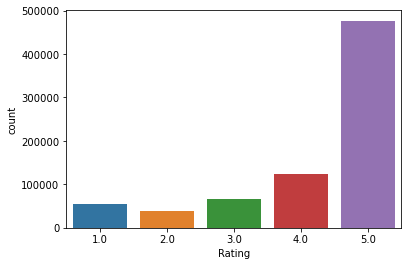

In [15]:
sns.countplot(x='Rating',data=train_data)

### Most of the rating are above 5

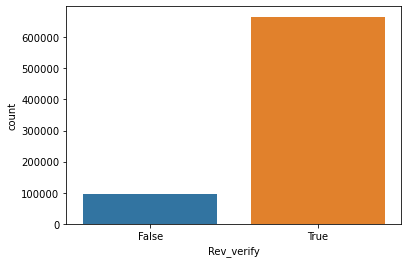

In [16]:
sns.countplot(x='Rev_verify',data=train_data)

### Most of the reviewer are verified in the dataset

# Dropping null values

In [17]:
train_data.dropna(axis=0,inplace=True)

In [18]:
train_data.isnull().sum()

Rating         0
Rev_verify     0
Review_Date    0
IC             0
Review         0
Rev_summ       0
dtype: int64

# Feature Extraction from Review Date

In [19]:
train_data.dtypes

Rating         float64
Rev_verify      object
Review_Date     object
IC              object
Review          object
Rev_summ        object
dtype: object

In [20]:
train_data['Year']=train_data['Review_Date'].str.split('/').str[2]
train_data['Month']=train_data['Review_Date'].str.split('/').str[0]

In [21]:
train_data.head()

,Rating,Rev_verify,Review_Date,IC,Review,Rev_summ,Year,Month
0,5.0,True,9/1/2015,B009XD5TPQ,Bought it for my husband. He's very happy with it,He's very happy with,2015,9
1,5.0,True,1/9/2016,B016MF3P3K,Great screen protector. Doesn't even seem as ...,Five Stars,2016,1
2,5.0,True,4/21/2013,B008DC8N5G,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,2013,4
3,3.0,True,2/27/2013,B0089CH3TM,"The material and fit is very nice, but the col...",Good case overall,2013,2
4,4.0,True,12/19/2013,B00AKZWGAC,This last me about 3 days till i have to charg...,Awesome Battery,2013,12


In [22]:
train_data.isnull().sum()

Rating         0
Rev_verify     0
Review_Date    0
IC             0
Review         0
Rev_summ       0
Year           0
Month          0
dtype: int64

In [23]:
train_data.Year = train_data.Year.astype(int)
train_data.Month = train_data.Month.astype(int)

In [24]:
train_data.drop('Review_Date',inplace=True,axis=1)

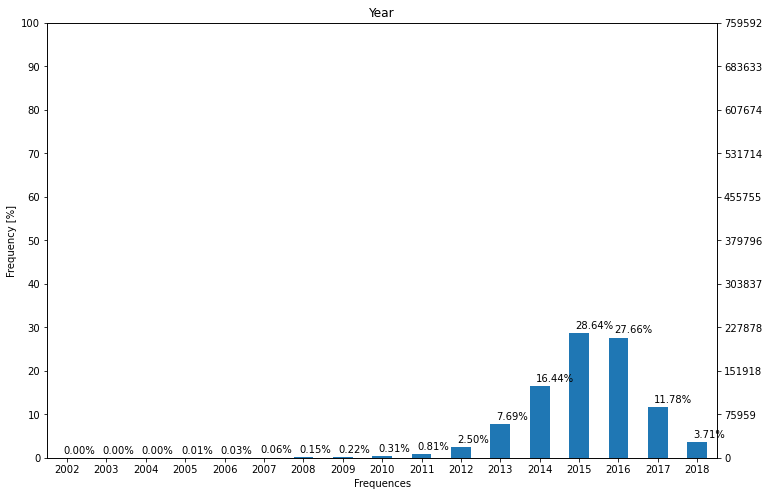

In [25]:
import numpy as np
plt.figure(figsize=(12,8))
plt.title('Year')
plt.xlabel('Frequences')
plt.ylabel('Frequency [%]')

ax = (train_data.Year.value_counts()/len(train_data)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(train_data)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

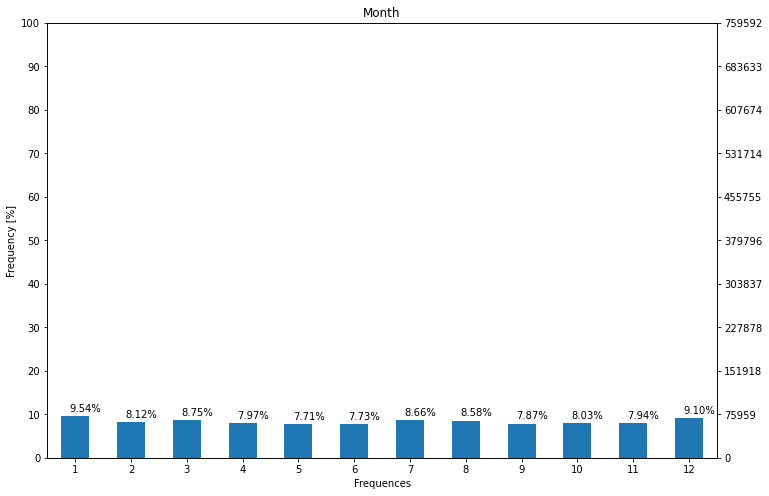

In [26]:
import numpy as np
plt.figure(figsize=(12,8))
plt.title('Month')
plt.xlabel('Frequences')
plt.ylabel('Frequency [%]')

ax = (train_data.Month.value_counts()/len(train_data)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(train_data)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [27]:
train_data.head()

,Rating,Rev_verify,IC,Review,Rev_summ,Year,Month
0,5.0,True,B009XD5TPQ,Bought it for my husband. He's very happy with it,He's very happy with,2015,9
1,5.0,True,B016MF3P3K,Great screen protector. Doesn't even seem as ...,Five Stars,2016,1
2,5.0,True,B008DC8N5G,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,2013,4
3,3.0,True,B0089CH3TM,"The material and fit is very nice, but the col...",Good case overall,2013,2
4,4.0,True,B00AKZWGAC,This last me about 3 days till i have to charg...,Awesome Battery,2013,12


[]

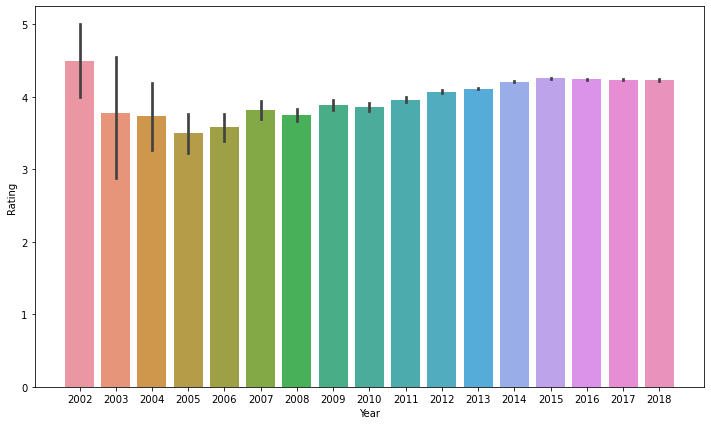

In [28]:
plt.figure(figsize=(12,7))
sns.barplot(x='Year',y='Rating',data=train_data)
plt.plot()

### Most of the higher rating are in year 2002 and in other year the frequecny of rating is normally distributed

In [29]:
train_data.head()

,Rating,Rev_verify,IC,Review,Rev_summ,Year,Month
0,5.0,True,B009XD5TPQ,Bought it for my husband. He's very happy with it,He's very happy with,2015,9
1,5.0,True,B016MF3P3K,Great screen protector. Doesn't even seem as ...,Five Stars,2016,1
2,5.0,True,B008DC8N5G,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,2013,4
3,3.0,True,B0089CH3TM,"The material and fit is very nice, but the col...",Good case overall,2013,2
4,4.0,True,B00AKZWGAC,This last me about 3 days till i have to charg...,Awesome Battery,2013,12


# Data Cleaning from reviews

In [66]:
df1 = train_data.groupby('IC' , as_index=False).agg(lambda x: x.tolist())

In [67]:
df1.tail()

,IC,Rating,Rev_verify,Review,Rev_summ,Year,Month
48128,B01HJBS5C2,"[5.0, 1.0, 3.0, 4.0, 5.0, 5.0, 2.0, 2.0, 2.0, ...","[True, True, True, True, True, True, True, Tru...","[Strong, protective but slim and light. I am a...","[nice and protective, One Star, A good solid 2...","[2017, 2018, 2016, 2016, 2017, 2017, 2016, 201...","[5, 1, 12, 7, 4, 1, 11, 2, 11, 10, 6, 8]"
48129,B01HJC7N4C,"[3.0, 5.0, 5.0, 5.0, 5.0]","[True, False, False, False, False]",[my sons likes it. For the price it isn't too ...,"[Three Stars, The VR headset is excellent and ...","[2017, 2016, 2016, 2016, 2016]","[1, 7, 7, 7, 7]"
48130,B01HJCN1UC,"[5.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, ...","[True, True, True, False, True, True, True, Tr...","[great thanks, good cable. just be sure to kno...","[Five Stars, very long cable cord, Pretty blue...","[2018, 2016, 2017, 2017, 2016, 2016, 2017, 201...","[1, 12, 6, 10, 9, 11, 2, 1, 2, 3, 3, 7, 11, 6,..."
48131,B01HJCN55I,"[5.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 2.0, 5.0, ...","[True, True, True, True, True, True, True, Tru...",[Received the cable in two days and it's the b...,"[Excellent, Useful, Can't beat these!, Great B...","[2016, 2017, 2017, 2017, 2016, 2016, 2016, 201...","[9, 3, 5, 3, 11, 9, 9, 5, 9, 6, 11]"
48132,B01HJH9IN6,"[1.0, 5.0, 2.0, 5.0, 1.0, 3.0]","[True, True, True, True, True, True]",[Just received it and it's VERY thin. No need ...,"[Not worth the money!!, Five Stars, Looked gre...","[2016, 2016, 2016, 2016, 2016, 2016]","[9, 12, 11, 7, 11, 8]"


In [68]:
column = ['Rating','Rev_verify','Rev_summ','Year','Month']
df1.drop(column,inplace=True,axis=1)

In [69]:
df1.head()

,IC,Review
0,7508492919,[It is such a good case for a low price. I hav...
1,7532385086,[I was very excited when I first got this case...
2,7887421268,"[Good item, Received this in about a weeks tim..."
3,8199900164,"[thank you., Works some of the time. The char..."
4,8288853439,[Great ! So far.\nI had this charger before an...


In [70]:
df1['liststring'] = [','.join(map(str, l)) for l in df1['Review']]

In [71]:
df1.head()

,IC,Review,liststring
0,7508492919,[It is such a good case for a low price. I hav...,It is such a good case for a low price. I have...
1,7532385086,[I was very excited when I first got this case...,I was very excited when I first got this case....
2,7887421268,"[Good item, Received this in about a weeks tim...","Good item,Received this in about a weeks time...."
3,8199900164,"[thank you., Works some of the time. The char...","thank you.,Works some of the time. The charge..."
4,8288853439,[Great ! So far.\nI had this charger before an...,Great ! So far.\nI had this charger before and...


In [72]:
df1.drop('Review',inplace=True,axis=1)

# Keywords Extraction from Review

In [73]:
for columns in df1.columns:
    df1['liststring'] = df1['liststring'].str.lower() 

In [74]:
import string
df1['remove_punc'] = df1['liststring'].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))

In [75]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [76]:
df1['text_without_stopwords'] = df1['remove_punc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [77]:
df1.head()

,IC,liststring,remove_punc,text_without_stopwords
0,7508492919,it is such a good case for a low price. i have...,it is such a good case for a low price i have ...,good case low price right never problems besid...
1,7532385086,i was very excited when i first got this case....,i was very excited when i first got this case ...,excited first got case loved color feel starte...
2,7887421268,"good item,received this in about a weeks time....",good itemreceived this in about a weeks time v...,good itemreceived weeks time nice actually con...
3,8199900164,"thank you.,works some of the time. the charge...",thank youworks some of the time the charger h...,thank youworks time charger stopped working da...
4,8288853439,great ! so far.\ni had this charger before and...,great so far\ni had this charger before and i...,great far charger seem last pretty good 3 year...


In [78]:
df1.drop('remove_punc',inplace=True,axis=1)

In [79]:
df1.head()

,IC,liststring,text_without_stopwords
0,7508492919,it is such a good case for a low price. i have...,good case low price right never problems besid...
1,7532385086,i was very excited when i first got this case....,excited first got case loved color feel starte...
2,7887421268,"good item,received this in about a weeks time....",good itemreceived weeks time nice actually con...
3,8199900164,"thank you.,works some of the time. the charge...",thank youworks time charger stopped working da...
4,8288853439,great ! so far.\ni had this charger before and...,great far charger seem last pretty good 3 year...


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [163]:
cv=CountVectorizer(max_df=0.85,stop_words=stop)
word_count_vector=cv.fit_transform(df1.text_without_stopwords)
word_count_vector.shape

(48133, 366733)

In [164]:
cv=CountVectorizer(max_df=0.85,stop_words=stop,max_features=50000)
word_count_vector=cv.fit_transform(df1.text_without_stopwords)
word_count_vector.shape

(48133, 50000)

In [165]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [173]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        #score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    
    results = feature_vals
  
 
    
    return results

In [175]:
# you only needs to do this once
feature_names=cv.get_feature_names()

# get the document that we want to extract keywords from
doc=df1.text_without_stopwords[0]

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,20)

# now print the results
print("\n=====Title=====")
print(df1.text_without_stopwords[0])
print("\n===Keywords===")
for k in keywords:
    print(k)


=====Title=====
good case low price right never problems besides losing 2 stones since purchase im rough recommend iti didnt get case thats shown picture case got black gold bow still cute wanted wanted picturemy teenage daughter loved case really pretty put 4 stars look little cheap looking expect much bling owhen dont want spend whole lot cash want great dealthis shop buy fromi liked cute studs fall easily protect phone would recommended buy like looksits cute stones lasted long time really makes phone look lot prettier funnierthe hirl wants needs hello kitty products happy collection choose friends wants hello kitty phone cases thanks sellerso cute love thisone drop done thoughi dropped iton bathroom floor cracked item cutethis case cute looks good white iphone pretty good quality one diamond fallen cos dropped cement kinda hard get whatever cute hot everyone compliments ithappy itthis case pretty girly looking problem hard put case jeans pocket bow stick would problem carry mine p

In [176]:
# put the common code into several methods
def get_keywords(idx):

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([df1.text_without_stopwords[idx]]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,20)
    
    return keywords

def print_results(idx,keywords):
    # now print the results
    print("\n=====Title=====")
    print(df1.text_without_stopwords[idx])
    print("\n===Keywords===")
    for k in keywords:
        print(k)

In [177]:

idx=0
keywords=get_keywords(idx)
print_results(idx,keywords)


=====Title=====
good case low price right never problems besides losing 2 stones since purchase im rough recommend iti didnt get case thats shown picture case got black gold bow still cute wanted wanted picturemy teenage daughter loved case really pretty put 4 stars look little cheap looking expect much bling owhen dont want spend whole lot cash want great dealthis shop buy fromi liked cute studs fall easily protect phone would recommended buy like looksits cute stones lasted long time really makes phone look lot prettier funnierthe hirl wants needs hello kitty products happy collection choose friends wants hello kitty phone cases thanks sellerso cute love thisone drop done thoughi dropped iton bathroom floor cracked item cutethis case cute looks good white iphone pretty good quality one diamond fallen cos dropped cement kinda hard get whatever cute hot everyone compliments ithappy itthis case pretty girly looking problem hard put case jeans pocket bow stick would problem carry mine p

In [178]:
tf_idf_vector=tfidf_transformer.transform(cv.transform(df1.text_without_stopwords))

results=[]
for i in range(tf_idf_vector.shape[0]):
    
    # get vector for a single document
    curr_vector=tf_idf_vector[i]
    
    #sort the tf-idf vector by descending order of scores
    sorted_items=sort_coo(curr_vector.tocoo())

    #extract only the top n; n here is 20
    keywords=extract_topn_from_vector(feature_names,sorted_items,20)
    
    
    results.append(keywords)

df=pd.DataFrame(zip(df1.IC,df1.text_without_stopwords,results),columns=['IC','Review','keywords'])
df

,IC,Review,keywords
0,7508492919,good case low price right never problems besid...,"[case, cute, bow, stones, pretty, compliments,..."
1,7532385086,excited first got case loved color feel starte...,"[thisgoodi, arrivei, refund, phonereceived, sn..."
2,7887421268,good itemreceived weeks time nice actually con...,"[case, itemreceived, electromaster, spots, cov..."
3,8199900164,thank youworks time charger stopped working da...,"[lolbought, chargingawesome, beeps, youworks, ..."
4,8288853439,great far charger seem last pretty good 3 year...,"[charger, galaxy, blackberry, chargers, 1217, ..."
...,...,...,...
48128,B01HJBS5C2,strong protective slim light already ordering ...,"[belt, clip, holster, case, phone, headphone, ..."
48129,B01HJC7N4C,sons likes price isnt badrecently received fre...,"[vr, headset, rockrok, 3d, apps, glasses, virt..."
48130,B01HJCN1UC,great thanksgood cable sure know length longer...,"[cable, kindle, tangle, monster, cord, cords, ..."
48131,B01HJCN55I,received cable two days best 10ft cable rechar...,"[fire, cable, kindle, upsets, time, pricehad, ..."


In [180]:
df['keywords'] = [','.join(map(str, l)) for l in df['keywords']]

In [181]:
df.head()

,IC,Review,keywords
0,7508492919,good case low price right never problems besid...,"case,cute,bow,stones,pretty,compliments,phone,..."
1,7532385086,excited first got case loved color feel starte...,"thisgoodi,arrivei,refund,phonereceived,snazzy,..."
2,7887421268,good itemreceived weeks time nice actually con...,"case,itemreceived,electromaster,spots,coversgo..."
3,8199900164,thank youworks time charger stopped working da...,"lolbought,chargingawesome,beeps,youworks,work,..."
4,8288853439,great far charger seem last pretty good 3 year...,"charger,galaxy,blackberry,chargers,1217,1212,s..."


# Feature Extraction from Rating

In [183]:
column=['Rev_verify','Year','Month','Review','Rev_summ']
rating_data = train_data.drop(column,axis=1)

In [184]:
group_mean = rating_data.groupby(['IC'],as_index=False).mean()

In [185]:
group_mean.head()

,IC,Rating
0,7508492919,4.300000
1,7532385086,3.285714
2,7887421268,3.538462
3,8199900164,3.750000
4,8288853439,3.818182


In [186]:
group_mean.shape

(48133, 2)

In [187]:
group_max = rating_data.groupby(['IC'],as_index=False).max()

In [188]:
group_max.head()

,IC,Rating
0,7508492919,5.0
1,7532385086,5.0
2,7887421268,5.0
3,8199900164,5.0
4,8288853439,5.0


In [189]:
group_min = rating_data.groupby(['IC'],as_index=False).min()

In [190]:
group_min.head()

,IC,Rating
0,7508492919,1.0
1,7532385086,1.0
2,7887421268,1.0
3,8199900164,2.0
4,8288853439,1.0


In [191]:
rating_1 = pd.merge(group_max, group_mean, left_on='IC', right_on='IC', how='left',suffixes=('_Max','_Mean'))

In [192]:
rating_1.head()

,IC,Rating_Max,Rating_Mean
0,7508492919,5.0,4.300000
1,7532385086,5.0,3.285714
2,7887421268,5.0,3.538462
3,8199900164,5.0,3.750000
4,8288853439,5.0,3.818182


In [194]:
rating_final = pd.merge(rating_1, group_min, left_on='IC', right_on='IC', how='left')

In [195]:
rating_final.head()

,IC,Rating_Max,Rating_Mean,Rating
0,7508492919,5.0,4.300000,1.0
1,7532385086,5.0,3.285714,1.0
2,7887421268,5.0,3.538462,1.0
3,8199900164,5.0,3.750000,2.0
4,8288853439,5.0,3.818182,1.0


In [196]:
rating_final.shape

(48133, 4)

In [197]:
rating_final.isnull().sum()

IC             0
Rating_Max     0
Rating_Mean    0
Rating         0
dtype: int64

# Loaded Dataframe

In [198]:
final_data = pd.merge(rating_final,df, left_on='IC', right_on='IC', how='left')

In [227]:
final_data.head()

,IC,Rating_Max,Rating_Mean,Rating,Review,keywords
0,7508492919,5.0,4.300000,1.0,good case low price right never problems besid...,"case,cute,bow,stones,pretty,compliments,phone,..."
1,7532385086,5.0,3.285714,1.0,excited first got case loved color feel starte...,"thisgoodi,arrivei,refund,phonereceived,snazzy,..."
2,7887421268,5.0,3.538462,1.0,good itemreceived weeks time nice actually con...,"case,itemreceived,electromaster,spots,coversgo..."
3,8199900164,5.0,3.750000,2.0,thank youworks time charger stopped working da...,"lolbought,chargingawesome,beeps,youworks,work,..."
4,8288853439,5.0,3.818182,1.0,great far charger seem last pretty good 3 year...,"charger,galaxy,blackberry,chargers,1217,1212,s..."


## Let’s check the polarity of this sample review. Polarity ranges from -1 (most negative) to 1 (most positive)

In [226]:
from nltk.stem.wordnet import WordNetLemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [229]:
final_data['text_lemmatized'] = final_data.Review.apply(lemmatize_text)

In [230]:
final_data.head()

,IC,Rating_Max,Rating_Mean,Rating,Review,keywords,text_lemmatized
0,7508492919,5.0,4.300000,1.0,good case low price right never problems besid...,"case,cute,bow,stones,pretty,compliments,phone,...","[good, case, low, price, right, never, problem..."
1,7532385086,5.0,3.285714,1.0,excited first got case loved color feel starte...,"thisgoodi,arrivei,refund,phonereceived,snazzy,...","[excited, first, got, case, loved, color, feel..."
2,7887421268,5.0,3.538462,1.0,good itemreceived weeks time nice actually con...,"case,itemreceived,electromaster,spots,coversgo...","[good, itemreceived, week, time, nice, actuall..."
3,8199900164,5.0,3.750000,2.0,thank youworks time charger stopped working da...,"lolbought,chargingawesome,beeps,youworks,work,...","[thank, youworks, time, charger, stopped, work..."
4,8288853439,5.0,3.818182,1.0,great far charger seem last pretty good 3 year...,"charger,galaxy,blackberry,chargers,1217,1212,s...","[great, far, charger, seem, last, pretty, good..."


In [231]:
final_data['text_lemmatized'] = [','.join(map(str, l)) for l in final_data['text_lemmatized']]

In [238]:
df6 = final_data.replace(',',' ', regex=True)

In [239]:
df6.head()

,IC,Rating_Max,Rating_Mean,Rating,Review,keywords,text_lemmatized
0,7508492919,5.0,4.300000,1.0,good case low price right never problems besid...,case cute bow stones pretty compliments phone ...,good case low price right never problem beside...
1,7532385086,5.0,3.285714,1.0,excited first got case loved color feel starte...,thisgoodi arrivei refund phonereceived snazzy ...,excited first got case loved color feel starte...
2,7887421268,5.0,3.538462,1.0,good itemreceived weeks time nice actually con...,case itemreceived electromaster spots coversgo...,good itemreceived week time nice actually cons...
3,8199900164,5.0,3.750000,2.0,thank youworks time charger stopped working da...,lolbought chargingawesome beeps youworks work ...,thank youworks time charger stopped working da...
4,8288853439,5.0,3.818182,1.0,great far charger seem last pretty good 3 year...,charger galaxy blackberry chargers 1217 1212 s...,great far charger seem last pretty good 3 year...


In [240]:
from textblob import TextBlob
df6[['polarity', 'subjectivity']] = df6['text_lemmatized'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [241]:
df6.head()

,IC,Rating_Max,Rating_Mean,Rating,Review,keywords,text_lemmatized,polarity,subjectivity
0,7508492919,5.0,4.300000,1.0,good case low price right never problems besid...,case cute bow stones pretty compliments phone ...,good case low price right never problem beside...,0.300607,0.653035
1,7532385086,5.0,3.285714,1.0,excited first got case loved color feel starte...,thisgoodi arrivei refund phonereceived snazzy ...,excited first got case loved color feel starte...,0.261528,0.501121
2,7887421268,5.0,3.538462,1.0,good itemreceived weeks time nice actually con...,case itemreceived electromaster spots coversgo...,good itemreceived week time nice actually cons...,0.313355,0.534117
3,8199900164,5.0,3.750000,2.0,thank youworks time charger stopped working da...,lolbought chargingawesome beeps youworks work ...,thank youworks time charger stopped working da...,0.500000,0.500000
4,8288853439,5.0,3.818182,1.0,great far charger seem last pretty good 3 year...,charger galaxy blackberry chargers 1217 1212 s...,great far charger seem last pretty good 3 year...,0.191157,0.605900


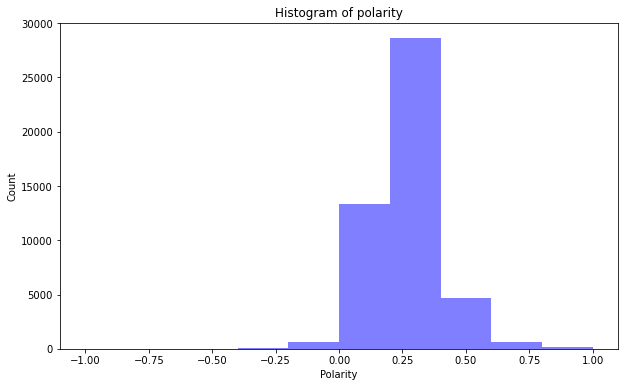

In [242]:
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df6.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

### Most of the product reviews are positive as shown in above graph as the polarity is above 0 and thats show the positive sentiment of the customers for all product in tha e-commerece

In [243]:
df6[['keywords']] = df6[['keywords']].replace(' ',',', regex=True)

In [244]:
df6.head()

,IC,Rating_Max,Rating_Mean,Rating,Review,keywords,text_lemmatized,polarity,subjectivity
0,7508492919,5.0,4.300000,1.0,good case low price right never problems besid...,"case,cute,bow,stones,pretty,compliments,phone,...",good case low price right never problem beside...,0.300607,0.653035
1,7532385086,5.0,3.285714,1.0,excited first got case loved color feel starte...,"thisgoodi,arrivei,refund,phonereceived,snazzy,...",excited first got case loved color feel starte...,0.261528,0.501121
2,7887421268,5.0,3.538462,1.0,good itemreceived weeks time nice actually con...,"case,itemreceived,electromaster,spots,coversgo...",good itemreceived week time nice actually cons...,0.313355,0.534117
3,8199900164,5.0,3.750000,2.0,thank youworks time charger stopped working da...,"lolbought,chargingawesome,beeps,youworks,work,...",thank youworks time charger stopped working da...,0.500000,0.500000
4,8288853439,5.0,3.818182,1.0,great far charger seem last pretty good 3 year...,"charger,galaxy,blackberry,chargers,1217,1212,s...",great far charger seem last pretty good 3 year...,0.191157,0.605900


In [245]:
df6.drop('text_lemmatized',inplace=True,axis=1)

# Final dataframe 

In [246]:
df6.head()

,IC,Rating_Max,Rating_Mean,Rating,Review,keywords,polarity,subjectivity
0,7508492919,5.0,4.300000,1.0,good case low price right never problems besid...,"case,cute,bow,stones,pretty,compliments,phone,...",0.300607,0.653035
1,7532385086,5.0,3.285714,1.0,excited first got case loved color feel starte...,"thisgoodi,arrivei,refund,phonereceived,snazzy,...",0.261528,0.501121
2,7887421268,5.0,3.538462,1.0,good itemreceived weeks time nice actually con...,"case,itemreceived,electromaster,spots,coversgo...",0.313355,0.534117
3,8199900164,5.0,3.750000,2.0,thank youworks time charger stopped working da...,"lolbought,chargingawesome,beeps,youworks,work,...",0.500000,0.500000
4,8288853439,5.0,3.818182,1.0,great far charger seem last pretty good 3 year...,"charger,galaxy,blackberry,chargers,1217,1212,s...",0.191157,0.605900


In [247]:
df6.shape

(48133, 8)

In [250]:
df6.to_json('ProjectOutput.json')

### Observation and Conclusion :
    - In this dataset, I had follow all life cycle of a Data Science.
    - I had done Data collection, Data cleaning, Data Extraction, Visualization and Model Building
    - In this dataset as per requirements, I had come to final output as Product ID, Respective Rating (min,max,mean),
      Review of the product, respective important top 20 keywords included sentiment value(Polarity and Subjectivity)
    - In this I uses Vectorizer, TfIDF,lammatizer, numpy, pandas, seaborn, textblob etc.
    - As per the review , most of the product is having positive sentiment towards the product also shown in last graph.
    - I calculate the top keywords by using tfidf, so the highest dense value is taken.
    - There are total 48133 products in the data set, so i Merge all respective review and generate the output, so that
      we can have a look on total review of single product not on e by one review of all users.
    - I merge all user review on a single product as per requirement
    - In the final dataframe there are no null values.
    - Most of the rating are above 5
    - Most of the users traffic on the website is in year 2015 and 2016.